**TEXT CLASSIFICATION - QUESTION CLASSIFIER**

**Author : Anusha Kanagala, Snehal Utage**

Text Classification is a task of automatically classifying/labeling the documents into one or more predefined categories. It is one of the fundamental tasks of Machine Learning (ML) algorithm for Natural Language processing (NLP).

**Dataset-** Kaggle Dataset of StackExchange Questions related to iOS and Android**

**Implementation Steps -**

1. Import Libraries

2. Load Dataset and Exploratory Data Analysis and Visualize the Dataset

3. Pre-processing of Text (Stop words, punctuation removal, and lemmatization)

4. Feature Extraction(Vectorization using TF-IDF)

5. ML Model building

6. Testing on Test Dataset - preprocess the test data and use the best trained ML model



**1. IMPORT LIBRARIES**


**IMPORT ALL THE REQUIRED MODULES FOR IMPLEMENTATION OF TEXT CLASSIFICATION USING MACHINE LEARNING ALGORITHMS**


In [156]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**2. LOAD DATASETS AND EXPLORATORY DATA ANALYSIS, VISUALIZE - BAR PLOTS, WORDCLOUDS**

**LOAD TRAINING DATASET INTO data BY READING FROM A CSV FILE AND PRINT FIRST 5 LINES OF THE DATAFRAME**

In [157]:
data = pd.read_excel('Dataset.xlsx',skiprows=[0], index_col=0)
data.head()

,Trial ID,Title,Abstract,Start Year,Completion Year,Phase,Conditions,Gender,Registry,Investigators/Contacts,Sponsors/Collaborators,GRID IDs,City of Sponsor/Collaborator,State of Sponsor/Collaborator,Country of Sponsor/Collaborator,Collaborating Funders,Funder Group,Funder Country,Source Linkout,Dimensions URL,FOR (ANZSRC) Categories,FOR 1,FOR 2,FOR 3,FOR 4,FOR 5,RCDC Categories,RCDC 1,RCDC 2,RCDC 3,RCDC 4,RCDC 5,HRCS HC Categories,HRCS_HC 1,HRCS_HC 2,HRCS_HC 3,HRCS_HC 4,HRCS_HC 5,HRCS RAC Categories,HRCS_RAC 1,HRCS_RAC 2,HRCS_RAC 3,HRCS_RAC 4,HRCS_RAC 5,ICRP Cancer Types,ICRP Cancer Types 1,ICRP Cancer Types 2,ICRP Cancer Types 3,ICRP Cancer Types 4,ICRP Cancer Types 5,ICRP CSO Categories,ICRP CSO 1,ICRP CSO 2,ICRP CSO 3,ICRP CSO 4,ICRP CSO 5
Rank,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,NCT04132999,Positive Airway Pressure for the Treatment of ...,Determine the efficacy of family-informed inte...,2021.0,2024.0,NaN,Obstructive Sleep Apnea; Down Syndrome,All,ClinicalTrials.gov,NaN,Children's Hospital of Philadelphia; National ...,grid.239552.a; grid.94365.3d; grid.279885.9; g...,Philadelphia; Bethesda; Bethesda; Cincinnati; ...,Pennsylvania; Maryland; Maryland; Ohio; Pennsy...,United States; United States; United States; U...,Children's Hospital of Philadelphia; National ...,ICRP; NIH,United States; United States; United States,https://clinicaltrials.gov/show/NCT04132999,https://app.dimensions.ai/details/clinical_tri...,1102 Cardiorespiratory Medicine and Haematolog...,1102 Cardiorespiratory Medicine and Haematology,1117 Public Health and Health Services,11 Medical and Health Sciences,NaN,NaN,Clinical Trials and Supportive Activities; Lun...,Clinical Trials and Supportive Activities,Lung,Sleep Research,Mental Health,Clinical Research,NaN,NaN,NaN,NaN,NaN,NaN,7.1 Individual care needs,7.1 Individual care needs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NCT04077047,Understanding and Developing a Network-based S...,HIV/AIDS is the second leading cause of death ...,2021.0,2023.0,NaN,HIV/AIDS,All,ClinicalTrials.gov,NaN,Duke University; National Institute of Mental ...,grid.26009.3d; grid.416868.5,Durham; Bethesda,North Carolina; Maryland,United States; United States,National Institute of Mental Health,NIH; ICRP,United States,https://clinicaltrials.gov/show/NCT04077047,https://app.dimensions.ai/details/clinical_tri...,1117 Public Health and Health Services; 11 Med...,1117 Public Health and Health Services,11 Medical and Health Sciences,NaN,NaN,NaN,Prevention; Clinical Research; Behavioral and ...,Prevention,Clinical Research,Behavioral and Social Science,Mental Health,HIV/AIDS,Infection,Infection,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NCT04018625,An Internet-Delivered Mind-Body Program for Re...,The present trial will evaluate the feasibilit...,2021.0,2023.0,NaN,Pregnancy Related; Perinatal Depression; Anxie...,Female,ClinicalTrials.gov,NaN,Stony Brook University; Massachusetts General ...,grid.36425.36; grid.32224.35; grid.420089.7,Stony Brook; Boston; Bethesda,New York; Massachusetts; Maryland,United States; United States; United States,Massachusetts General Hospital; National Insti...,ICRP; NIH,United States; United States,https://clinicaltrials.gov/show/NCT04018625,https://app.dimensions.ai/details/clinical_tri...,11 Medical and Health Sciences; 1117 Public He...,11 Medical and Health Sciences,1117 Public Health and Health Services,17 Psychology and Cognitive Sciences,1701 Psychology,1114 Paediatrics and Reproductive Medicine,Clinical Trials and Supportive Activities; Beh...,Clinical Trials and Supportive Activities,Behavioral and Social Science,Mind and Body,Mental Health,Pediatric Research Initiative,Mental Health; Reproductive Health and Childbirth,Mental Health,Reproductive Health and Childbirth,NaN,NaN,NaN,6.6 Psychological and behavioural,6.6 Psychological and behavioural,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

**PRINT A CONCISE SUMMARY OF DATA DataFrame USING INFO METHOD**

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32728 entries, 100 to 100
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Trial ID                         32728 non-null  object 
 1   Title                            32728 non-null  object 
 2   Abstract                         32724 non-null  object 
 3   Start Year                       31271 non-null  float64
 4   Completion Year                  27695 non-null  float64
 5   Phase                            18193 non-null  object 
 6   Conditions                       32715 non-null  object 
 7   Gender                           32728 non-null  object 
 8   Registry                         32728 non-null  object 
 9   Investigators/Contacts           0 non-null      float64
 10  Sponsors/Collaborators           32728 non-null  object 
 11  GRID IDs                         32253 non-null  object 
 12  City of Sponsor/Co

**CLASS DISTRIBUTION ON TRAINING DATAFRAME - DATA**

**GET THE COUNT OF TARGET COLUMN 'HRCS_HC 1' AND PLOT A BARPLOT TO REPRESENT HEALTH CATEGORIES WITH RESPECT TO ITS COUNT VALUE**

Cancer                                12531
Mental Health                          2906
Infection                              2869
Cardiovascular                         1650
Metabolic and Endocrine                1463
Neurological                            996
Reproductive Health and Childbirth      820
Stroke                                  797
Inflammatory and Immune System          707
Respiratory                             621
Musculoskeletal                         529
Oral and Gastrointestinal               359
Eye                                     325
Renal and Urogenital                    313
Generic Health Relevance                214
Blood                                   127
Skin                                    110
Injuries and Accidents                   76
Congenital Disorders                     72
Ear                                      50
Other                                     5
Name: HRCS_HC 1, dtype: int64


Text(0, 0.5, 'Count')

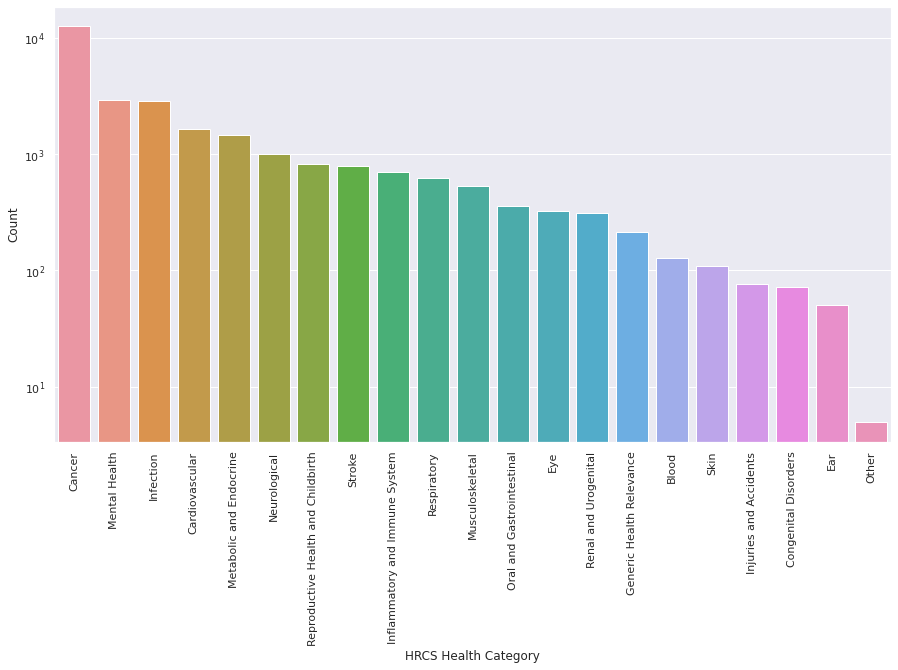

In [159]:
#HRCS Health Categories
hc=data['HRCS_HC 1'].value_counts()
print(hc)
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.barplot(x=hc.index,y=hc)
g.set_yscale("log")
plt.xticks(rotation=90)
plt.xlabel("HRCS Health Category")
plt.ylabel("Count")

Lung Cancer                                                  1891
Breast Cancer                                                1635
Leukemia / Leukaemia                                         1569
Not Site-Specific Cancer                                     1135
Non-Hodgkin's Lymphoma                                       1102
Prostate Cancer                                               836
Colon and Rectal Cancer                                       796
Brain Tumor                                                   718
Melanoma                                                      472
Ovarian Cancer                                                465
Liver Cancer                                                  378
Pancreatic Cancer                                             354
Myeloma                                                       315
Head and Neck Cancer                                          309
Cervical Cancer                                               297
Kidney Can

Text(0, 0.5, 'Count')

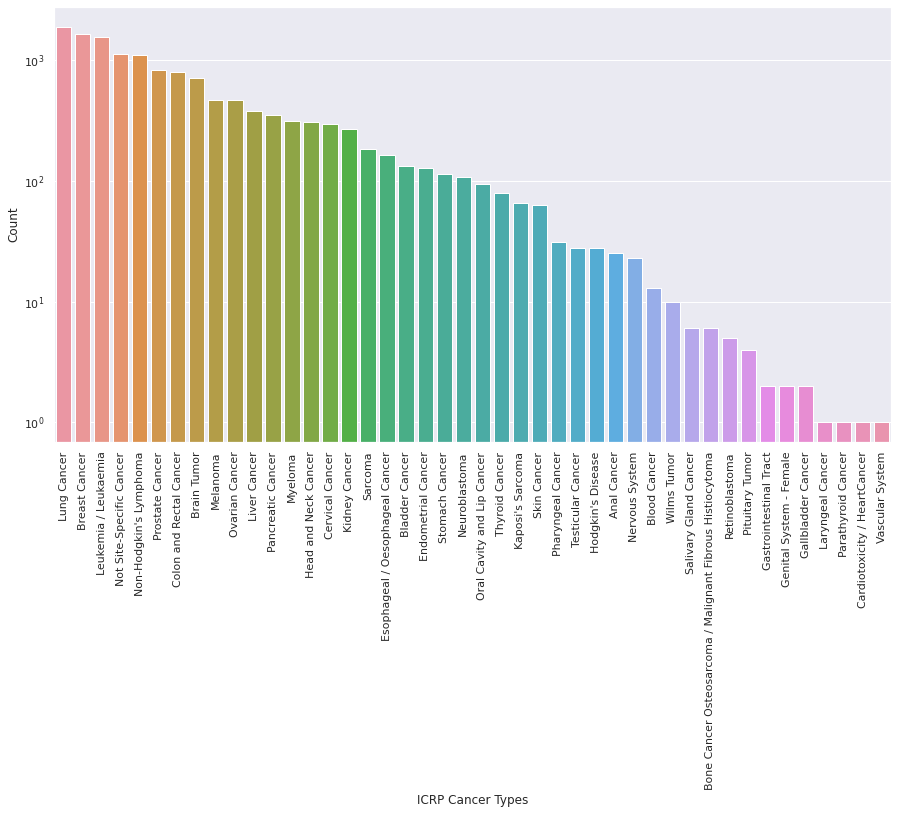

In [160]:
#ICRP Cancer Types
cancer_type=data['ICRP Cancer Types 1'].value_counts()
print(cancer_type)
sns.set(rc = {'figure.figsize':(15,8)})
g = sns.barplot(x=cancer_type.index,y=cancer_type)
g.set_yscale("log")
plt.xticks(rotation=90)
plt.xlabel("ICRP Cancer Types")
plt.ylabel("Count")

**CHECK FOR ANY MISSING VALUES IN THE TRAINING DATAFRAME - DATA**

In [161]:
data_with_input_target_only = data.filter(['Title', 'Abstract', 'Conditions', 'HRCS_HC 1', 'ICRP Cancer Types 1'])

In [162]:
data_with_input_target_only.isna().sum()

Title                      0
Abstract                   4
Conditions                13
HRCS_HC 1               5188
ICRP Cancer Types 1    18864
dtype: int64

In [163]:
#Missing values
data_with_input_target_only.isna().sum()
updated_data = data_with_input_target_only.dropna(axis=0, subset=['Title', 'Abstract','Conditions', 'HRCS_HC 1', 'ICRP Cancer Types 1'])
updated_data.head()

,Title,Abstract,Conditions,HRCS_HC 1,ICRP Cancer Types 1
Rank,,,,,
100,"A Phase 1/2 Study of MPH966, an Oral Neutrophi...",The purpose of this study is evaluate the safe...,Hematologic Malignancy,Inflammatory and Immune System,Leukemia / Leukaemia
100,Incidence of Human Immunodeficiency Virus (HIV...,This research trial studies the incidence of h...,HIV Infection,Infection,Anal Cancer
100,A Multilevel Intervention (Potlako+) to Improv...,This study evaluates whether the Potlako+ inte...,Cancer Suspect; Anal Cancer; Vulvar Cancer; HN...,Cancer,Not Site-Specific Cancer
100,Duloxetine to Prevent Oxaliplatin-Induced Chem...,This phase II/III trial studies the best dose ...,Stage III Colorectal Cancer AJCC v8; Stage II ...,Cancer,Colon and Rectal Cancer
100,Randomized Phase III Trial Incorporating Abira...,This phase III trial studies how well adding a...,Stage IVA Prostate Cancer AJCC v8; Stage IIIC ...,Cancer,Prostate Cancer


In [164]:
updated_data.isna().sum()

Title                  0
Abstract               0
Conditions             0
HRCS_HC 1              0
ICRP Cancer Types 1    0
dtype: int64

**FIND THE WORD COUNT FOR EACH ROW DATA FOR THE COLUMNS 'Title' AND 'Abstract'**

In [165]:
#Count of words and character in Title of the question
updated_data['Title Word Count'] = updated_data['Title'].apply(lambda x: len(str(x).split()))
updated_data['Title Character Count']= updated_data['Title'].apply(len)

for category in set(updated_data['HRCS_HC 1']):
  print("Average number of words in Title for category : ", category ,":", int(updated_data[updated_data['HRCS_HC 1'] == category]['Title Word Count'].mean()))
  print("Average number of characters in Title for category: ",category, ":", int(updated_data[updated_data['HRCS_HC 1'] == category]['Title Character Count'].mean()))
  print(" ")

Average number of words in Title for category :  Skin : 15
Average number of characters in Title for category:  Skin : 109
 
Average number of words in Title for category :  Oral and Gastrointestinal : 13
Average number of characters in Title for category:  Oral and Gastrointestinal : 99
 
Average number of words in Title for category :  Eye : 20
Average number of characters in Title for category:  Eye : 153
 
Average number of words in Title for category :  Respiratory : 11
Average number of characters in Title for category:  Respiratory : 90
 
Average number of words in Title for category :  Blood : 15
Average number of characters in Title for category:  Blood : 123
 
Average number of words in Title for category :  Stroke : 10
Average number of characters in Title for category:  Stroke : 76
 
Average number of words in Title for category :  Renal and Urogenital : 13
Average number of characters in Title for category:  Renal and Urogenital : 105
 
Average number of words in Title for

In [166]:
updated_data.head()

,Title,Abstract,Conditions,HRCS_HC 1,ICRP Cancer Types 1,Title Word Count,Title Character Count
Rank,,,,,,,
100,"A Phase 1/2 Study of MPH966, an Oral Neutrophi...",The purpose of this study is evaluate the safe...,Hematologic Malignancy,Inflammatory and Immune System,Leukemia / Leukaemia,22,168
100,Incidence of Human Immunodeficiency Virus (HIV...,This research trial studies the incidence of h...,HIV Infection,Infection,Anal Cancer,15,92
100,A Multilevel Intervention (Potlako+) to Improv...,This study evaluates whether the Potlako+ inte...,Cancer Suspect; Anal Cancer; Vulvar Cancer; HN...,Cancer,Not Site-Specific Cancer,11,85
100,Duloxetine to Prevent Oxaliplatin-Induced Chem...,This phase II/III trial studies the best dose ...,Stage III Colorectal Cancer AJCC v8; Stage II ...,Cancer,Colon and Rectal Cancer,17,160
100,Randomized Phase III Trial Incorporating Abira...,This phase III trial studies how well adding a...,Stage IVA Prostate Cancer AJCC v8; Stage IIIC ...,Cancer,Prostate Cancer,26,212


**REPRESENTATION OF WORDCLOUD FOR 'Title' COLUMN IN THE DATASET TO SHOW THE CLUSTER OF WORDS. (THE BIGGER AND BOLDER THE WORD APPEARS, THE MORE OFTEN IT IS MENTIONED AND MORE IMPORTANT IT IS)**

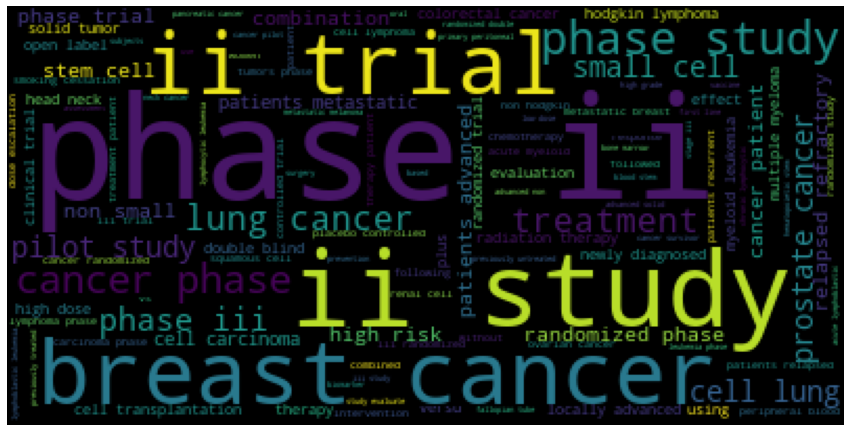

In [167]:
word_string=" ".join(updated_data['Title'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**REPRESENTATION OF WORDCLOUD FOR 'Abstract' COLUMN IN THE DATASET TO SHOW THE CLUSTER OF WORDS. (THE BIGGER AND BOLDER THE WORD APPEARS, THE MORE OFTEN IT IS MENTIONED AND MORE IMPORTANT IT IS)**

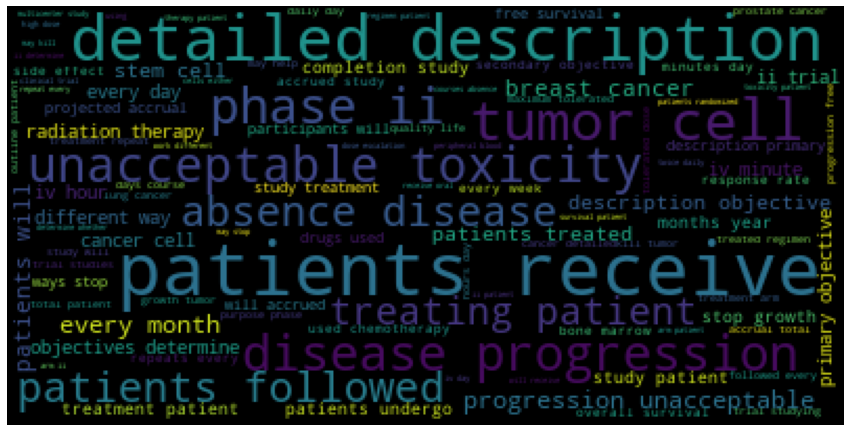

In [168]:
word_string=" ".join(updated_data['Abstract'].str.lower())
wordcloud = WordCloud(stopwords=STOPWORDS).generate(word_string)

plt.subplots(figsize=(15,15))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**3. TEXT PRE_PROCESSING AND SPLIT DATASET FOR TRAINING AND VALIDATION**

**METHOD TO REMOVE THE STOP WORDS FROM TITLE AND BODY COLUMN AND CREATE NEW COLUMNS IN THE DATAFRAME WITHOUT STOPWORDS**

In [169]:
def lower_stopword_punc(string):
    lower_string = string.lower()
    a = [i for i in lower_string.split() if i not in stopwords.words('english')]
    no_stop_words = ' '.join(a)
    remove_punc = re.sub(r'[^\w\s]', '', no_stop_words)
    return remove_punc


**APPLYING LEMMATIZATION ON TRAIN DATA FOR BOTH THE COLUMNS TO REDUCE THE WORD TO ITS BASE FORM**

In [170]:
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

updated_data['stopword_removed_text'] = updated_data['Title'].apply(lambda x: lower_stopword_punc(x))
updated_data['clean_text'] = updated_data['stopword_removed_text'].apply(lambda x: lemmatizer(x))
updated_data.head()

,Title,Abstract,Conditions,HRCS_HC 1,ICRP Cancer Types 1,Title Word Count,Title Character Count,stopword_removed_text,clean_text
Rank,,,,,,,,,
100,"A Phase 1/2 Study of MPH966, an Oral Neutrophi...",The purpose of this study is evaluate the safe...,Hematologic Malignancy,Inflammatory and Immune System,Leukemia / Leukaemia,22,168,phase 12 study mph966 oral neutrophil elastase...,phase 12 study mph966 oral neutrophil elastase...
100,Incidence of Human Immunodeficiency Virus (HIV...,This research trial studies the incidence of h...,HIV Infection,Infection,Anal Cancer,15,92,incidence human immunodeficiency virus hiv amo...,incidence human immunodeficiency virus hiv amo...
100,A Multilevel Intervention (Potlako+) to Improv...,This study evaluates whether the Potlako+ inte...,Cancer Suspect; Anal Cancer; Vulvar Cancer; HN...,Cancer,Not Site-Specific Cancer,11,85,multilevel intervention potlako improve timely...,multilevel intervention potlako improve timely...
100,Duloxetine to Prevent Oxaliplatin-Induced Chem...,This phase II/III trial studies the best dose ...,Stage III Colorectal Cancer AJCC v8; Stage II ...,Cancer,Colon and Rectal Cancer,17,160,duloxetine prevent oxaliplatininduced chemothe...,duloxetine prevent oxaliplatininduced chemothe...
100,Randomized Phase III Trial Incorporating Abira...,This phase III trial studies how well adding a...,Stage IVA Prostate Cancer AJCC v8; Stage IIIC ...,Cancer,Prostate Cancer,26,212,randomized phase iii trial incorporating abira...,randomize phase iii trial incorporate abirater...


**CLASSIFYING DATA INTO TRAIN AND TEST FOR THE COLUMN TITLE USING SKLEARN MODEL**

In [171]:
#Dividing the training set into train and valid set for Target as HRCS Health Categories
X_train, X_test, y_train, y_test = train_test_split(updated_data["clean_text"],updated_data["HRCS_HC 1"],test_size=0.3,shuffle=True)

In [172]:
#Dividing the training set into train and valid set for Target as ICRP Cancer Types
X_train_icrp, X_test_icrp, y_train_icrp, y_test_icrp = train_test_split(updated_data["clean_text"],updated_data["ICRP Cancer Types 1"],test_size=0.3,shuffle=True)

**CLASSIFYING DATA INTO TRAIN AND TEST FOR THE COLUMN BODY USING SKLEARN MODEL**

In [173]:
#Dividing the training set into train and valid set
#X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(data["clean_text_body"],data["LabelNum"],test_size=0.2,shuffle=True)

**4. FEATURE EXTRACTION - VECTORIZATION**

**APPLYING TERM FREQUENCY VECTORIZER FOR THE COLUMN TITLE TO GET TF-IDF**

In [174]:
#Tf-Idf for HRCS HC
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [175]:
#Tf-Idf for ICRP Cancer Types
tfidf_vectorizer_icrp = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf_icrp = tfidf_vectorizer_icrp.fit_transform(X_train_icrp) 
X_test_vectors_tfidf_icrp = tfidf_vectorizer_icrp.transform(X_test_icrp)

**APPLYING TERM FREQUENCY VECTORIZER FOR THE COLUMN BODY TO GET TF-IDF**

In [176]:
#Tf-Idf
#tfidf_vectorizer_B = TfidfVectorizer(use_idf=True)
#X_train_vectors_tfidf_B = tfidf_vectorizer_B.fit_transform(X_train_B) 
#X_test_vectors_tfidf_B = tfidf_vectorizer_B.transform(X_test_B)

**5. ML MODEL BUILDING AND TRAINING IT ON TRAIN DATASET AND TESTING ON VALIDATION SET**

**CLASSIFICATION MODEL USING LOGISTIC REGRESSION ON THE COLUMN TITLE**

In [177]:
#HRCS Health Category
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print(f1_score(y_test,y_predict,average='weighted'))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
#fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#roc_auc = auc(fpr, tpr)
#print('AUC:', roc_auc)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

                                    precision    recall  f1-score   support

                             Blood       0.33      0.14      0.20         7
                            Cancer       0.92      0.99      0.96      3450
                    Cardiovascular       0.29      0.05      0.08        42
                               Ear       0.00      0.00      0.00         1
                               Eye       0.00      0.00      0.00         1
          Generic Health Relevance       0.00      0.00      0.00        13
                         Infection       0.78      0.52      0.62        81
    Inflammatory and Immune System       0.53      0.15      0.24        65
                     Mental Health       0.66      0.40      0.49        48
           Metabolic and Endocrine       0.62      0.22      0.32        23
                   Musculoskeletal       0.00      0.00      0.00         1
                      Neurological       1.00      0.11      0.20         9
         Or

In [178]:
#ICRP Cancer Types
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf_icrp=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf_icrp.fit(X_train_vectors_tfidf_icrp, y_train_icrp)  
#Predict y value for test dataset
y_predict_icrp = lr_tfidf_icrp.predict(X_test_vectors_tfidf_icrp)
y_prob_icrp = lr_tfidf_icrp.predict_proba(X_test_vectors_tfidf_icrp)[:,1]
print(classification_report(y_test_icrp,y_predict_icrp))
print(f1_score(y_test_icrp,y_predict_icrp,average='weighted'))
print('Confusion Matrix:',confusion_matrix(y_test_icrp, y_predict_icrp))
 
#fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#roc_auc = auc(fpr, tpr)
#print('AUC:', roc_auc)
print("Accuracy:",metrics.accuracy_score(y_test_icrp, y_predict_icrp))

                                                           precision    recall  f1-score   support

                                              Anal Cancer       0.00      0.00      0.00        10
                                           Bladder Cancer       0.97      0.97      0.97        35
                                             Blood Cancer       0.00      0.00      0.00         0
Bone Cancer Osteosarcoma / Malignant Fibrous Histiocytoma       0.00      0.00      0.00         3
                                              Brain Tumor       0.89      0.93      0.91       160
                                            Breast Cancer       0.89      0.89      0.89       490
                                          Cervical Cancer       0.91      0.80      0.85        74
                                  Colon and Rectal Cancer       0.86      0.82      0.84       247
                                       Endometrial Cancer       0.97      0.85      0.90        39
         

**CLASSIFICATION MODEL USING LOGISTIC REGRESSION ON THE COLUMN BODY**

In [179]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
#lr_tfidf_B=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
#lr_tfidf_B.fit(X_train_vectors_tfidf_B, y_train_B)  
#Predict y value for test dataset
#y_predict_B = lr_tfidf_B.predict(X_test_vectors_tfidf_B)
#y_prob_B = lr_tfidf_B.predict_proba(X_test_vectors_tfidf_B)[:,1]
#print(classification_report(y_test_B,y_predict_B))
#print('Confusion Matrix:',confusion_matrix(y_test_B, y_predict_B))
 
#fpr, tpr, thresholds = roc_curve(y_test_B, y_prob_B)
#roc_auc = auc(fpr, tpr)
#print('AUC:', roc_auc)

**CLASSIFICATION MODEL USING NAIVE BAYES (TF-IDF) ON THE COLUMN TITLE**

In [180]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
print(f1_score(y_test,y_predict,average=None))
print('Confusion Matrix:',confusion_matrix(y_test, y_predict))
 
#fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#roc_auc = auc(fpr, tpr)
#print('AUC:', roc_auc)
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

                                    precision    recall  f1-score   support

                             Blood       0.00      0.00      0.00         7
                            Cancer       0.89      1.00      0.94      3450
                    Cardiovascular       0.00      0.00      0.00        42
                               Ear       0.00      0.00      0.00         1
                               Eye       0.00      0.00      0.00         1
          Generic Health Relevance       0.00      0.00      0.00        13
                         Infection       0.00      0.00      0.00        81
    Inflammatory and Immune System       0.00      0.00      0.00        65
                     Mental Health       0.00      0.00      0.00        48
           Metabolic and Endocrine       0.00      0.00      0.00        23
                   Musculoskeletal       0.00      0.00      0.00         1
                      Neurological       0.00      0.00      0.00         9
         Or

In [181]:
#ICRP Cancer Types
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf_icrp = MultinomialNB()
nb_tfidf_icrp.fit(X_train_vectors_tfidf_icrp, y_train_icrp)  
#Predict y value for test dataset
y_predict_icrp = nb_tfidf_icrp.predict(X_test_vectors_tfidf_icrp)
y_prob_icrp = nb_tfidf_icrp.predict_proba(X_test_vectors_tfidf_icrp)[:,1]
print(classification_report(y_test_icrp,y_predict_icrp))
print(f1_score(y_test_icrp,y_predict_icrp,average=None))
print('Confusion Matrix:',confusion_matrix(y_test_icrp, y_predict_icrp))
 
#fpr, tpr, thresholds = roc_curve(y_test, y_prob)
#roc_auc = auc(fpr, tpr)
#print('AUC:', roc_auc)
print("Accuracy:",metrics.accuracy_score(y_test_icrp, y_predict_icrp))

                                                           precision    recall  f1-score   support

                                              Anal Cancer       0.00      0.00      0.00        10
                                           Bladder Cancer       0.00      0.00      0.00        35
Bone Cancer Osteosarcoma / Malignant Fibrous Histiocytoma       0.00      0.00      0.00         3
                                              Brain Tumor       0.94      0.61      0.74       160
                                            Breast Cancer       0.46      0.93      0.62       490
                                          Cervical Cancer       1.00      0.05      0.10        74
                                  Colon and Rectal Cancer       0.87      0.39      0.54       247
                                       Endometrial Cancer       0.00      0.00      0.00        39
                          Esophageal / Oesophageal Cancer       0.00      0.00      0.00        47
         

**CLASSIFICATION MODEL USING NAIVE BAYES (TF-IDF) ON THE COLUMN BODY**

In [182]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
#nb_tfidf_B = MultinomialNB()
#nb_tfidf_B.fit(X_train_vectors_tfidf_B, y_train_B)  
#Predict y value for test dataset
#y_predict_B = nb_tfidf_B.predict(X_test_vectors_tfidf_B)
#y_prob_B = nb_tfidf_B.predict_proba(X_test_vectors_tfidf_B)[:,1]
#print(classification_report(y_test_B,y_predict_B))
#print('Confusion Matrix:',confusion_matrix(y_test_B, y_predict_B))
 
#fpr, tpr, thresholds = roc_curve(y_test_B, y_prob_B)
#roc_auc = auc(fpr, tpr)
#print('AUC:', roc_auc)

In [183]:
#SVM HRCS HC
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_vectors_tfidf, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test_vectors_tfidf)

print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred,average=None))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

                                    precision    recall  f1-score   support

                             Blood       0.00      0.00      0.00         7
                            Cancer       0.91      1.00      0.95      3450
                    Cardiovascular       0.00      0.00      0.00        42
                               Ear       0.00      0.00      0.00         1
                               Eye       0.00      0.00      0.00         1
          Generic Health Relevance       0.00      0.00      0.00        13
                         Infection       0.79      0.42      0.55        81
    Inflammatory and Immune System       1.00      0.08      0.14        65
                     Mental Health       0.47      0.17      0.25        48
           Metabolic and Endocrine       0.75      0.26      0.39        23
                   Musculoskeletal       0.00      0.00      0.00         1
                      Neurological       0.00      0.00      0.00         9
         Or

In [184]:
#SVM ICRP Cancer types
clf = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
clf.fit(X_train_vectors_tfidf_icrp, y_train_icrp)

#Predict the response for test dataset
y_pred_icrp = clf.predict(X_test_vectors_tfidf_icrp)

print(classification_report(y_test_icrp,y_pred_icrp))
print(f1_score(y_test_icrp,y_pred_icrp,average='weighted'))
print('Confusion Matrix:',confusion_matrix(y_test_icrp, y_pred_icrp))
print("Accuracy:",metrics.accuracy_score(y_test_icrp, y_pred_icrp))

                                                           precision    recall  f1-score   support

                                              Anal Cancer       0.00      0.00      0.00        10
                                           Bladder Cancer       0.97      0.97      0.97        35
Bone Cancer Osteosarcoma / Malignant Fibrous Histiocytoma       0.00      0.00      0.00         3
                                              Brain Tumor       0.90      0.92      0.91       160
                                            Breast Cancer       0.92      0.85      0.89       490
                                          Cervical Cancer       0.89      0.80      0.84        74
                                  Colon and Rectal Cancer       0.89      0.79      0.84       247
                                       Endometrial Cancer       0.92      0.92      0.92        39
                          Esophageal / Oesophageal Cancer       0.97      0.83      0.90        47
         

In [185]:
#k-NN
knn = KNeighborsClassifier(n_neighbors=7)

# training our classifier;
clf = knn.fit(X_train_vectors_tfidf, y_train )

#Predict the response for test dataset
y_pred = clf.predict(X_test_vectors_tfidf)

print(classification_report(y_test,y_pred))
print(f1_score(y_test,y_pred,average=None))
print('Confusion Matrix:',confusion_matrix(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

                                    precision    recall  f1-score   support

                             Blood       1.00      0.29      0.44         7
                            Cancer       0.91      0.99      0.95      3450
                    Cardiovascular       0.25      0.07      0.11        42
                               Ear       0.00      0.00      0.00         1
                               Eye       0.00      0.00      0.00         1
          Generic Health Relevance       0.00      0.00      0.00        13
                         Infection       0.79      0.32      0.46        81
    Inflammatory and Immune System       0.78      0.11      0.19        65
                     Mental Health       0.55      0.23      0.32        48
           Metabolic and Endocrine       0.45      0.22      0.29        23
                   Musculoskeletal       0.00      0.00      0.00         1
                      Neurological       0.00      0.00      0.00         9
         Or

In [186]:
#k-NN Cancer types
knn = KNeighborsClassifier(n_neighbors=7)

# training our classifier;
clf = knn.fit(X_train_vectors_tfidf_icrp, y_train_icrp )

#Predict the response for test dataset
y_pred_icrp = clf.predict(X_test_vectors_tfidf_icrp)

print(classification_report(y_test_icrp,y_pred_icrp))
print(f1_score(y_test_icrp,y_pred_icrp,average='weighted'))
print('Confusion Matrix:',confusion_matrix(y_test_icrp, y_pred_icrp))
print("Accuracy:",metrics.accuracy_score(y_test_icrp, y_pred_icrp))

                                                           precision    recall  f1-score   support

                                              Anal Cancer       1.00      0.20      0.33        10
                                           Bladder Cancer       0.81      0.74      0.78        35
                                             Blood Cancer       0.00      0.00      0.00         0
Bone Cancer Osteosarcoma / Malignant Fibrous Histiocytoma       0.00      0.00      0.00         3
                                              Brain Tumor       0.57      0.89      0.70       160
                                            Breast Cancer       0.62      0.79      0.69       490
                                          Cervical Cancer       0.63      0.64      0.63        74
                                  Colon and Rectal Cancer       0.72      0.67      0.69       247
                                       Endometrial Cancer       0.73      0.49      0.58        39
         